## This notebook's purpose is to plot results which will be used in the report


In [4]:
# Imports
import os
import json
import matplotlib.pyplot as plt
import numpy as np

## Load the JSON-file

In [2]:
def load_json_file(file_path):
    """
    Load a JSON log file where each line is a JSON object.
    :param file_path: Path to the JSON file.
    :return: List of JSON objects.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    data = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line:  # skip empty lines
                data.append(json.loads(line))
    return data

def get_path(experiment_name, file_name):
    """
    Get the path to the JSON log file.
    :param experiment_name: Name of the experiment.
    :param file_name: Name of the log file.
    :return: Full path to the log file.
    """
    path = os.path.dirname(os.path.abspath('__file__'))
    path = os.path.dirname(path)

    path = os.path.join(path, 'work_dirs', experiment_name, file_name)
    return path

def get_results(data):
    """
    Extract results from the loaded JSON data.
    :param data: List of JSON objects.
    :return: Dictionary with keys 'x' and 'y' for plotting.
    """
    epochs = []
    det_hmean = []
    for i, e in enumerate(data):
        if e.keys().__contains__("mode"):
            if e["mode"] == "val":
                epochs.append(e["epoch"])
                det_hmean.append(e["det-hmean"])
    return epochs, det_hmean

def plot_hmean(epochs, det_hmean, experiment_name):
    """
    Plot the detection hmean over epochs.
    :param epochs: List of epochs.
    :param det_hmean: List of detection hmean values.
    :param experiment_name: Name of the experiment for the plot title.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, det_hmean, marker='o')
    plt.title(f'Detection Hmean over Epochs - {experiment_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Detection Hmean')
    plt.grid()
    plt.savefig(f'{experiment_name}_det_hmean.png')
    plt.show()

In [23]:
experiment_name = "totaltext_det_kac"
json_file_name1 = "20250513_164333.log.json"
json_file_name2 = "20250513_195325.log.json"
data1 = load_json_file(get_path(experiment_name, json_file_name1))
data2 = load_json_file(get_path(experiment_name, json_file_name2))

# Concatenate the two dictionaries
data = data1 + data2

In [30]:
epochs = []
det_hmean = []

for i, e in enumerate(data):
    if e.keys().__contains__("mode"):
        if e["mode"] == "val":
            epochs.append(e["epoch"])
            det_hmean.append(e["det-hmean"])



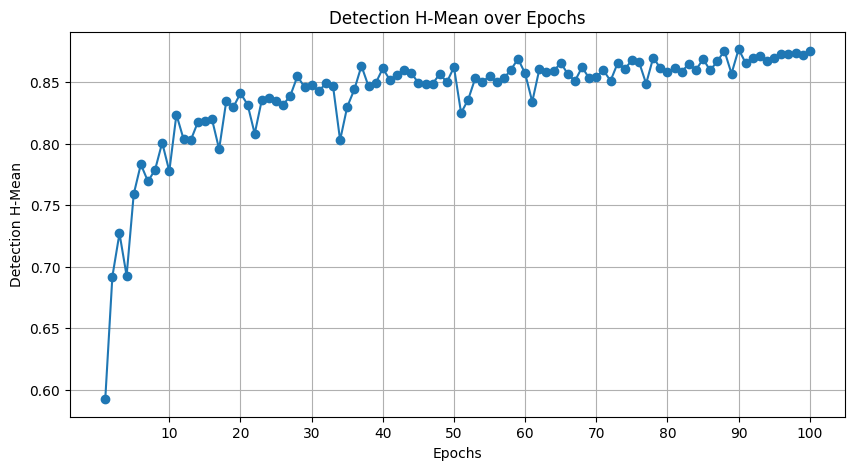

In [42]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(epochs, det_hmean, marker='o', label='det-hmean')
plt.title('Detection H-Mean over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Detection H-Mean')
plt.xticks([e for e in epochs if e % 10 == 0])
plt.grid()
plt.show()

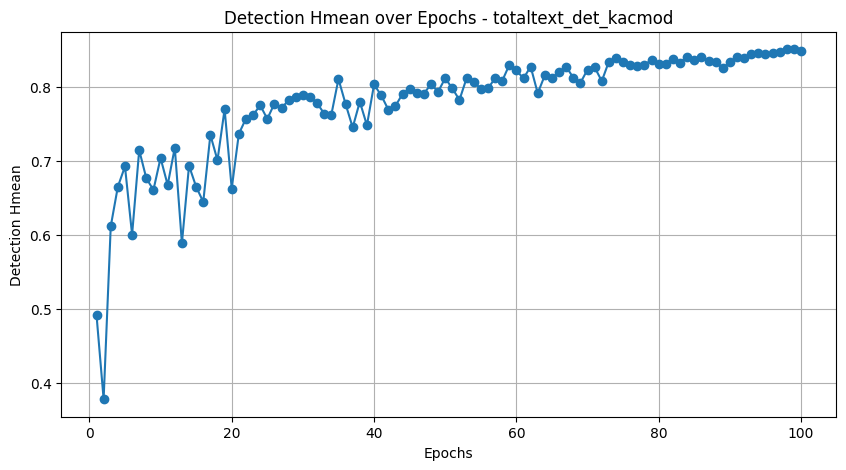

In [6]:
experiment_name = "totaltext_det_kacmod"
json_file_name = "20250519_130329.log.json"
data = load_json_file(get_path(experiment_name, json_file_name))
epochs, det_hmean = get_results(data)
# Plot the results
plot_hmean(epochs, det_hmean, experiment_name)
